In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class SimpleNN(nn.Module):
    def __init__(self, activation_fn):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 50)
        self.fc2 = nn.Linear(50, 1)
        self.activation_fn = activation_fn

    def forward(self, x):
        x = self.activation_fn(self.fc1(x))
        x = self.fc2(x)
        return x

activation_fns = {
    'sigmoid': nn.Sigmoid(),
    'tanh': nn.Tanh(),
    'relu': nn.ReLU()
}

In [3]:
models = {name: SimpleNN(act_fn) for name, act_fn in activation_fns.items()}

criterion = nn.MSELoss()
optimizers = {name: optim.SGD(model.parameters(), lr=0.01) for name, model in models.items()}

X = torch.randn(100, 2)
y = torch.randn(100, 1)



In [4]:
epochs = 1000
weight_distributions = {name: [] for name in models.keys()}

for epoch in range(epochs):
    for name, model in models.items():
        optimizers[name].zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizers[name].step()

        if epoch % 100 == 0:
            weights = model.fc1.weight.data.numpy().flatten()
            weight_distributions[name].append(weights)



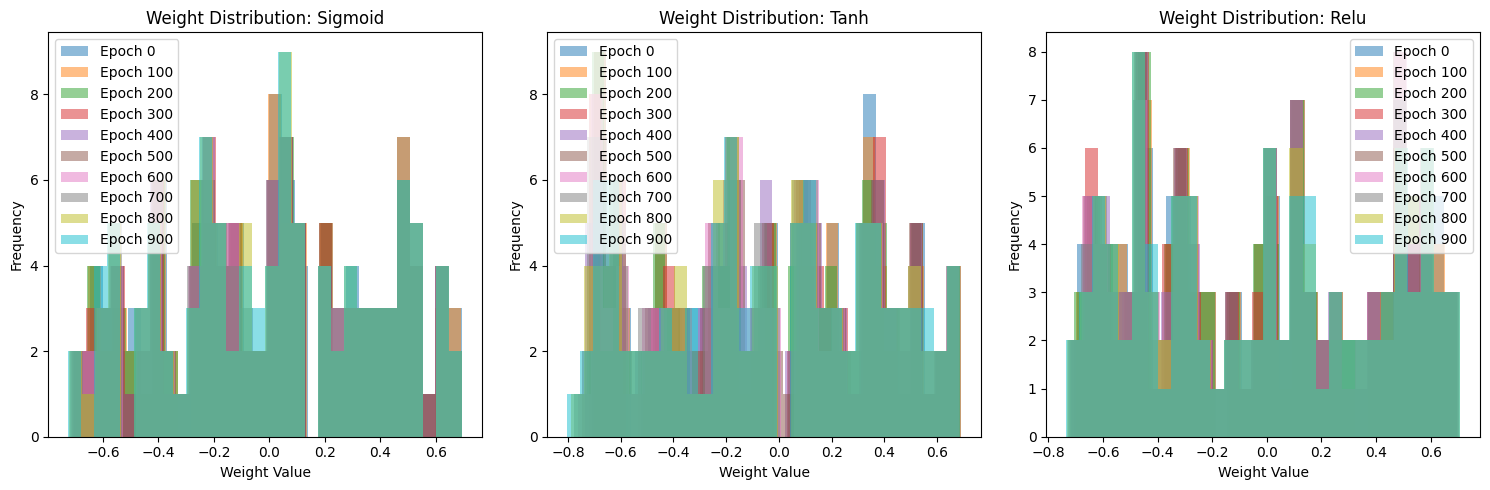

In [5]:
plt.figure(figsize=(15, 5))
for i, (name, weights) in enumerate(weight_distributions.items()):
    plt.subplot(1, 3, i+1)
    for epoch, w in enumerate(weights):
        plt.hist(w, bins=30, alpha=0.5, label=f'Epoch {epoch*100}')
    plt.title(f'Weight Distribution: {name.capitalize()}')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()